In [147]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
df = pd.read_csv('spam data.csv', encoding='latin-1')
df

,ï»¿v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ã_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [149]:
df.columns

Index(['ï»¿v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [150]:
df.columns = ['category', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
unwanted_columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df = df.drop(columns=unwanted_columns)
print(df.head())


  category                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [151]:
df 

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [152]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5572 non-null   object
 1   message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [153]:
df.isna().sum()

category    0
message     0
dtype: int64

In [154]:
df['Spam']=df['category'].apply(lambda x:1 if x=='spam' else 0)
df.head(5)

,category,message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


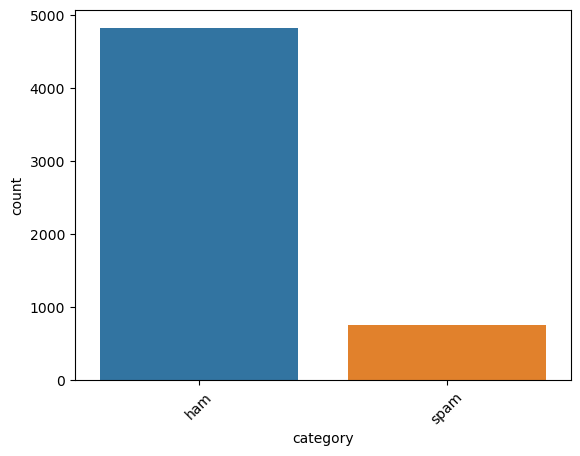

In [155]:
sns.countplot(data=df, x='category')
plt.xticks(rotation=45)
plt.show()


In [156]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.message,df.Spam,test_size=0.25)

In [157]:
from sklearn.feature_extraction.text import CountVectorizer

In [158]:
from sklearn.naive_bayes import MultinomialNB

In [159]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [160]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [171]:
emails=[
    'Great chance to get 50000 $ for free !!! click the below link to apply NOW !!!!'
]

In [172]:
clf.predict(emails)

array([1], dtype=int64)

This is a spam, be careful!!!!!


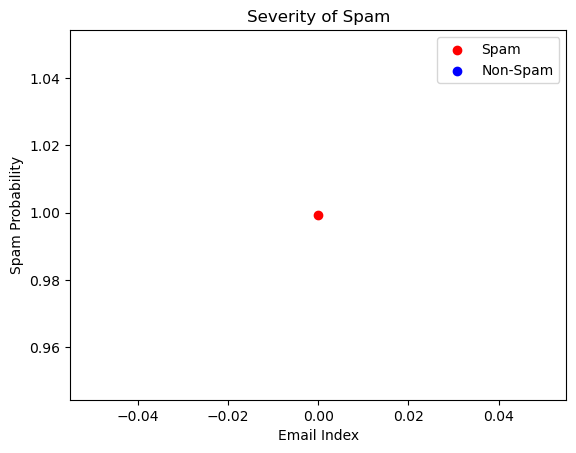

In [173]:
predictions = clf.predict(emails)

for prediction in predictions:
    if prediction == 1:
        print("\033[1;31mThis is a spam, be careful!!!!!" + "\033[0m")
    else:
        print("This is not a spam")


probabilities = clf.predict_proba(emails)[:, 1]
plt.scatter(range(len(emails)), probabilities, c='red', label='Spam')
non_spam_indices = np.where(probabilities < 0.5)[0]
plt.scatter(non_spam_indices, probabilities[non_spam_indices], c='blue', label='Non-Spam')
plt.xlabel('Email Index')
plt.ylabel('Spam Probability')
plt.title('Severity of Spam')
plt.legend()
plt.show()    


In [174]:
clf.score(X_test,y_test)

0.9863603732950467